<a href="https://www.kaggle.com/code/namitawalia/time-series-analysis-gold-price-predictions?scriptVersionId=169553330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-prediction-dataset/FINAL_USO.csv


Importing Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Reading the Data

In [3]:
df=pd.read_csv('/kaggle/input/gold-price-prediction-dataset/FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


Data Cleaning

In [4]:
df = df[['Date','Close']]
df.dtypes

Date      object
Close    float64
dtype: object

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [6]:
df.head()

,Date,Close
0,2011-12-15,152.330002
1,2011-12-16,155.229996
2,2011-12-19,154.869995
3,2011-12-20,156.979996
4,2011-12-21,157.160004


In [7]:
df=df.set_index('Date')
df.head()

,Close
Date,
2011-12-15,152.330002
2011-12-16,155.229996
2011-12-19,154.869995
2011-12-20,156.979996
2011-12-21,157.160004


EDA

In [8]:
df.describe()

,Close
count,1718.000000
mean,127.319482
std,17.536269
min,100.500000
25%,116.052502
50%,121.795002
75%,128.470001
max,173.610001


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


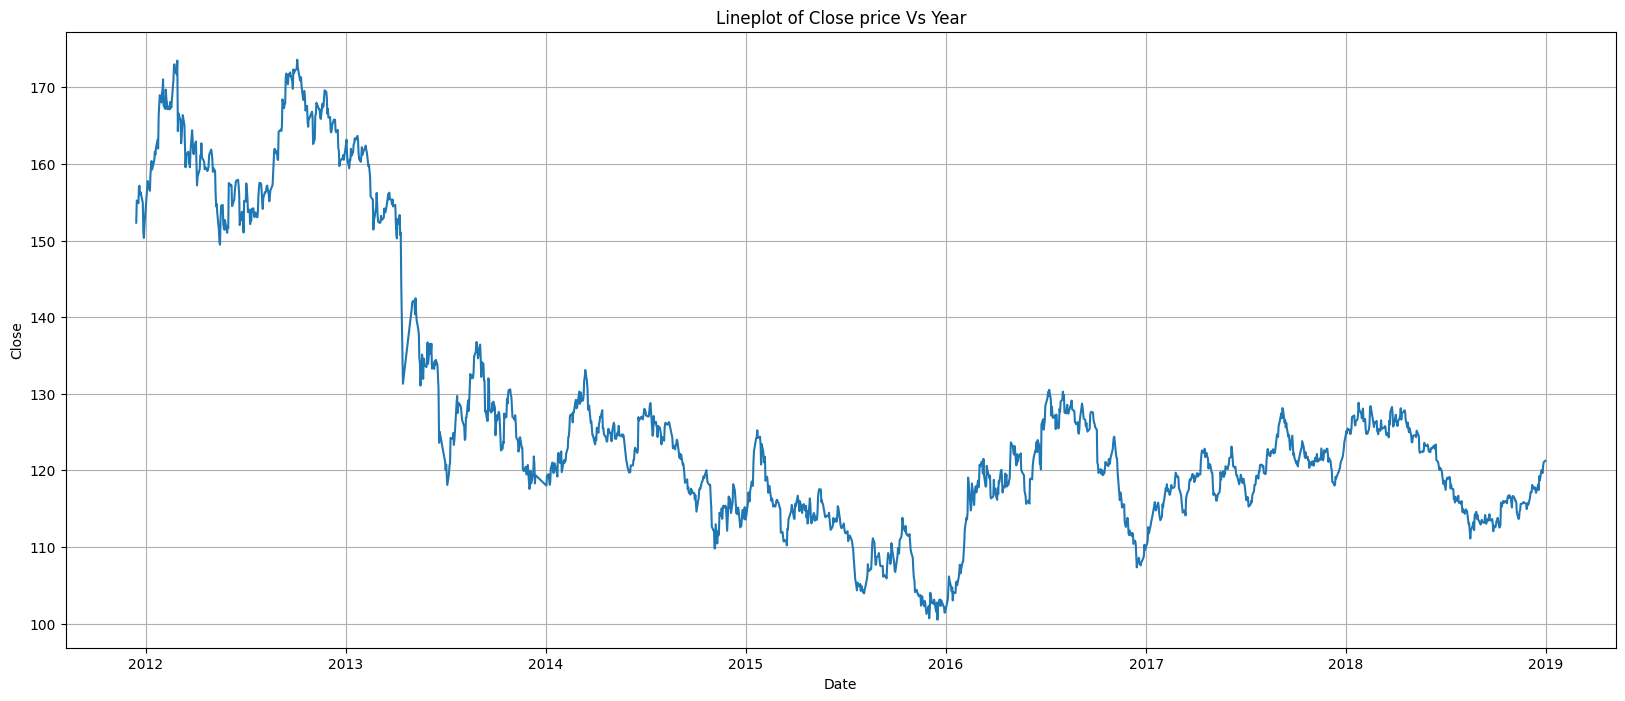

In [9]:
# Line Plot of Close Price Vs Year

plt.figure(figsize=(20,8))
sns.lineplot(x=df.index,y="Close",data=df)
plt.title(f'Lineplot of Close price Vs Year')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid()

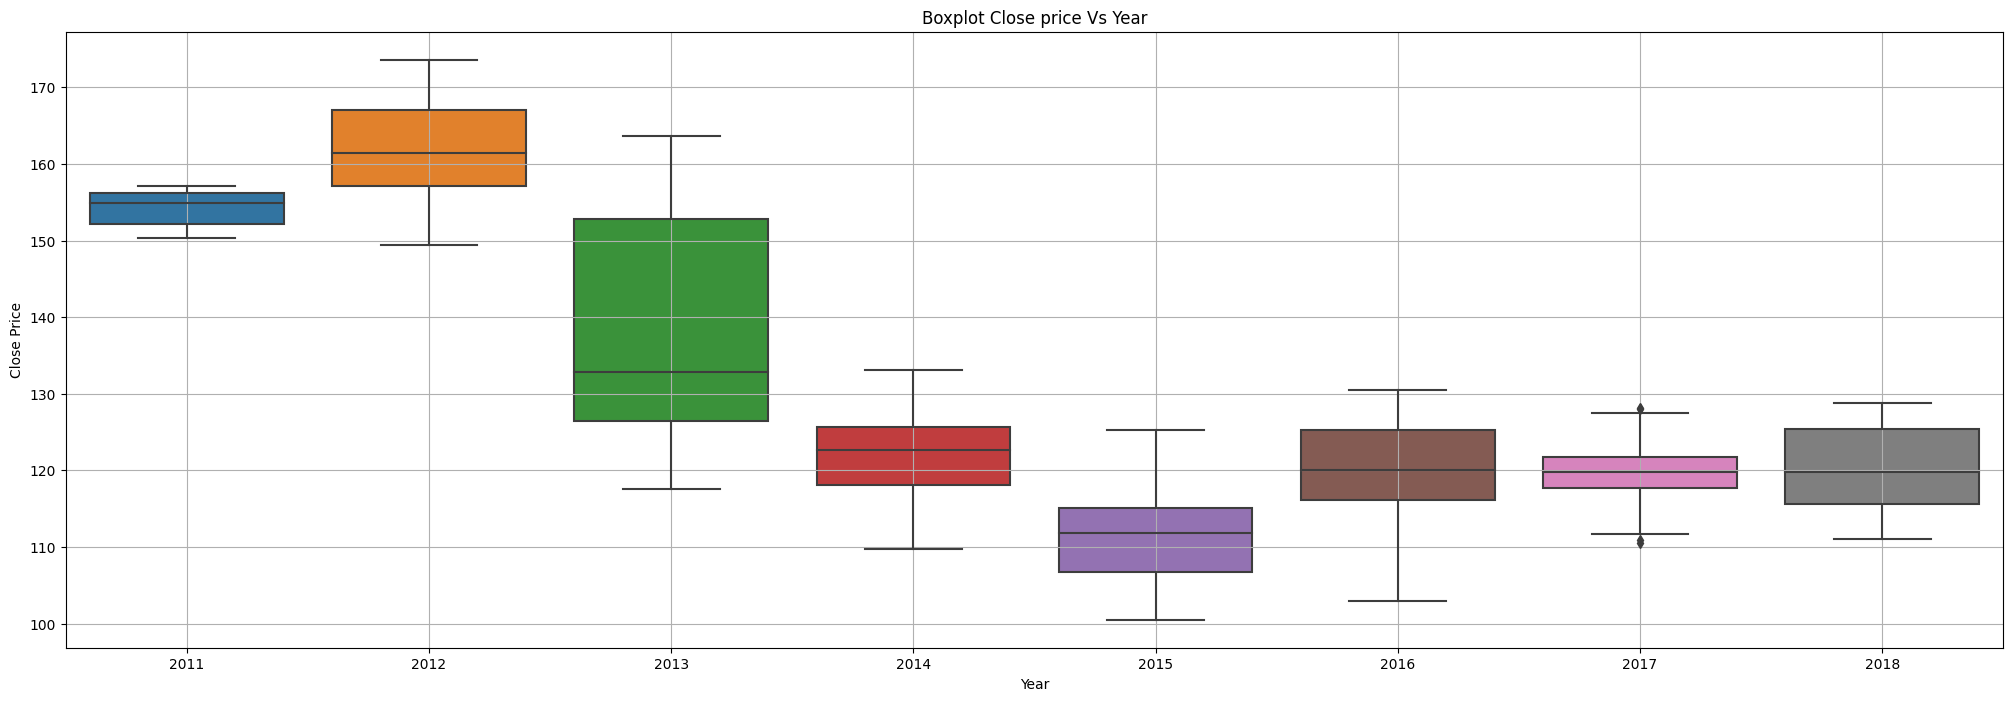

In [10]:
# Close price Vs Year
_, ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0],ax=ax)
plt.title('Boxplot Close price Vs Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.grid()

In [11]:
#Yearly Coefficient of Variation of Close Prices in percentage
df_1=df.groupby(df.index.year).mean().rename(columns={'Close':'Mean'})
df_1= df_1.merge(df.groupby(df.index.year).std().rename(columns={'Close':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct']=((df_1["Std"]/df_1["Mean"])*100).round(2)
df_1

# the coefficient of variation tells you how much variation there is in relation to the mean. It's a way to understand the relative variability within a dataset.

,Mean,Std,Cov_pct
Date,,,
2011,154.289999,2.440942,1.58
2012,161.867429,6.065573,3.75
2013,137.429103,14.334819,10.43
2014,121.832898,5.007629,4.11
2015,111.107160,5.568863,5.01
2016,119.375847,6.862491,5.75
2017,119.721895,3.123910,2.61
2018,120.207178,5.194631,4.32


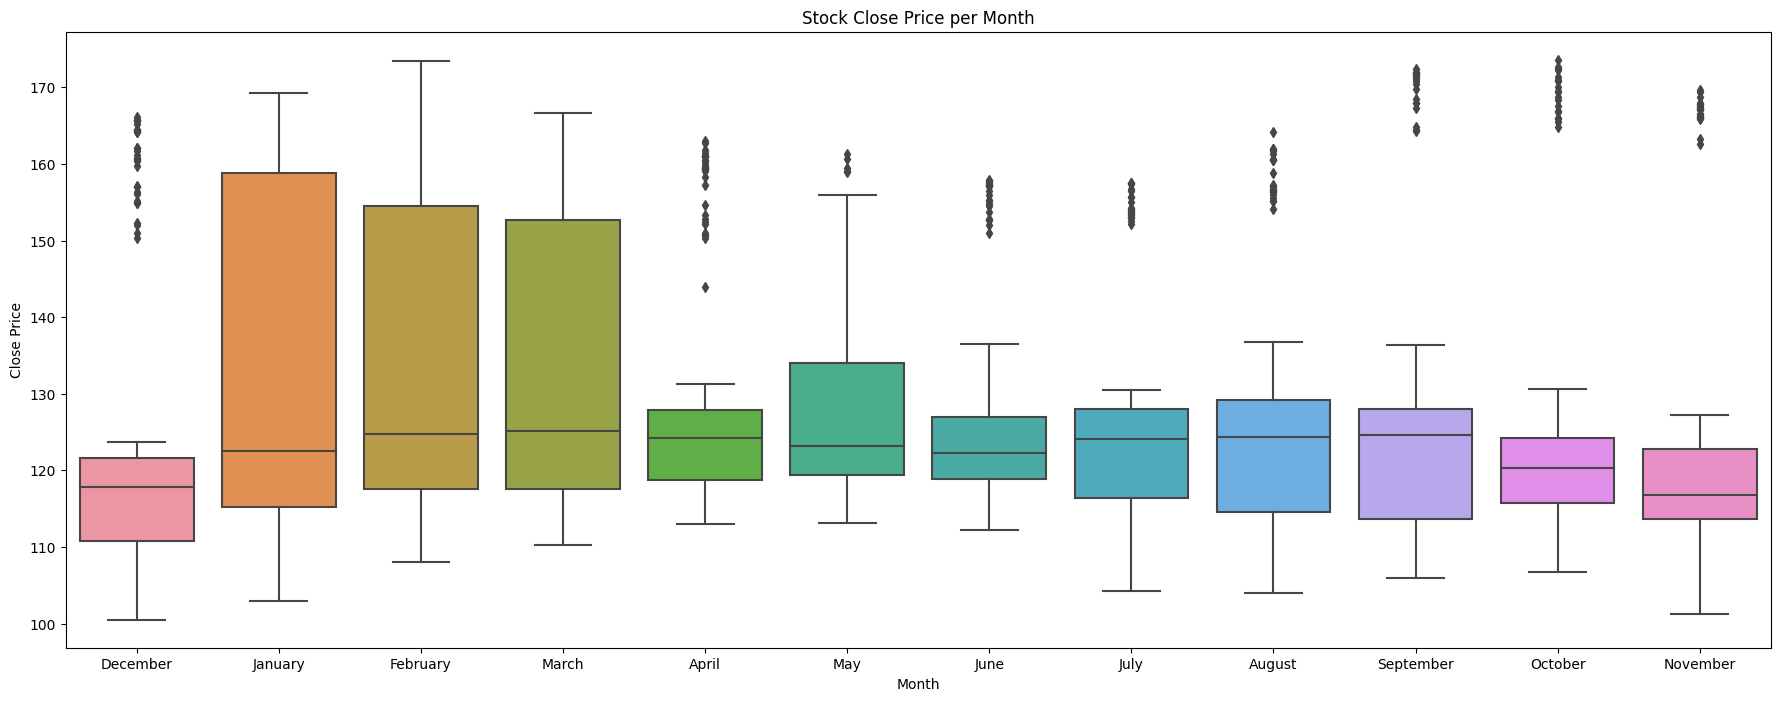

In [12]:
#Boxplot of Stock Close Price per Month
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y= df.values[:, 0],ax=ax)
plt.title('Stock Close Price per Month')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()

/tmp/ipykernel_18/1949196183.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly_sum = df.resample('A').mean()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


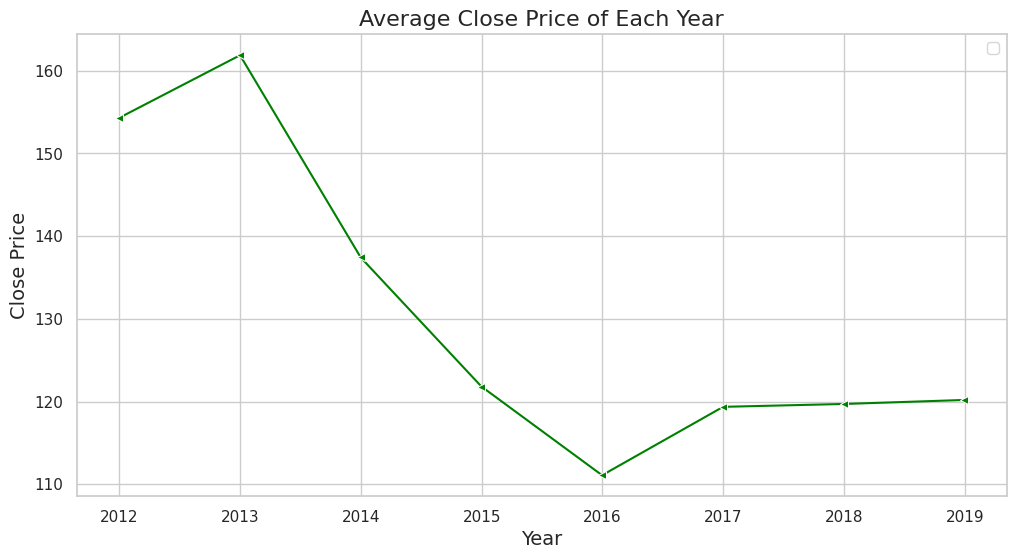

In [13]:
#Average Close Price of Each Year

#df is aggregated at an annual frequency(A), with the values representing the mean of each year.
df_yearly_sum = df.resample('A').mean()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_yearly_sum.index, y='Close', data=df_yearly_sum, marker='<', color='green')
plt.title('Average Close Price of Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend()
plt.show()



/tmp/ipykernel_18/3667033331.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quaterly_sum=df.resample('Q').mean()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


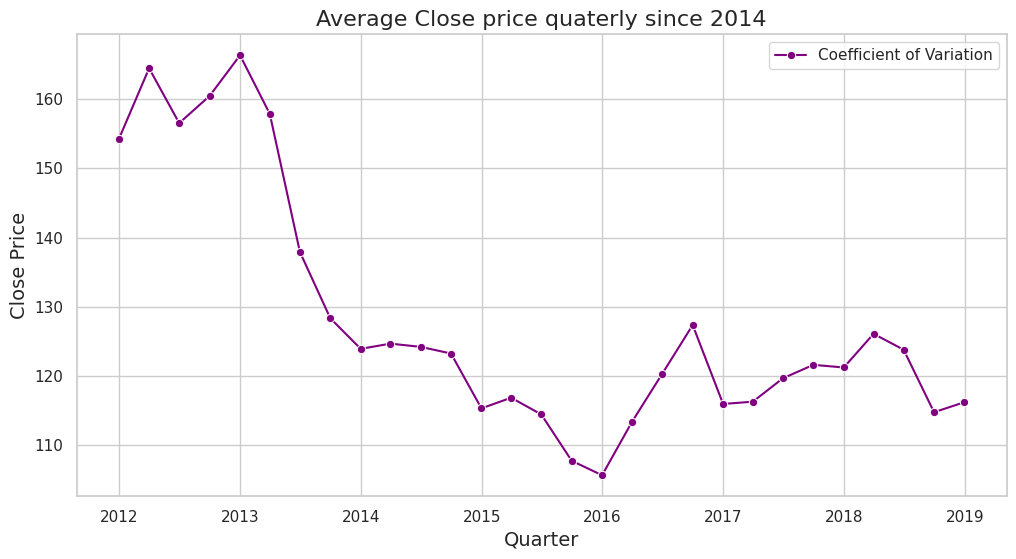

In [14]:
#Average Close price quaterly since 2014
df_quaterly_sum=df.resample('Q').mean()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_quaterly_sum.index, y='Close', data=df_quaterly_sum, marker='o', color='purple', label='Coefficient of Variation')
plt.title('Average Close price quaterly since 2014', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend()
plt.show()

/tmp/ipykernel_18/3786196557.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_mean = df.resample('Q')['Close'].mean()


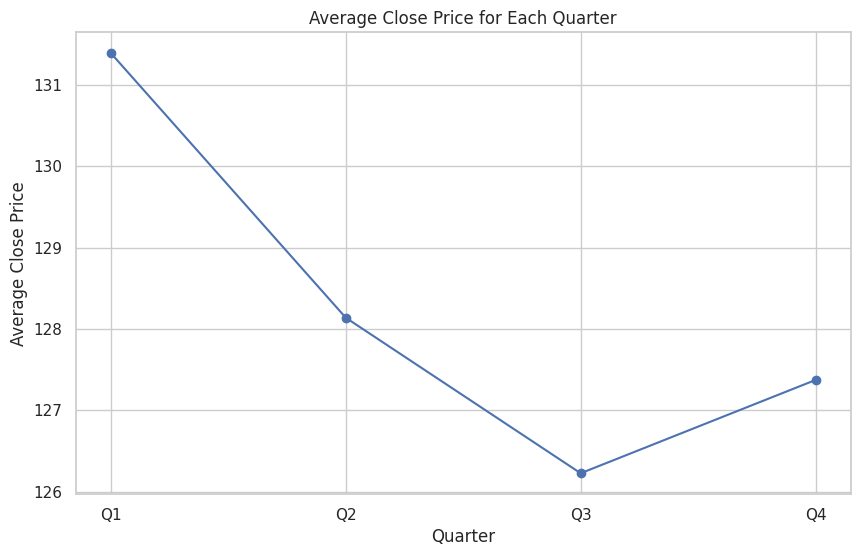

In [15]:

# Resample the data quarterly and calculate the mean close price for each quarter
quarterly_mean = df.resample('Q')['Close'].mean()

# Extract quarterly averages for each quarter over the years
q1_avg = quarterly_mean[quarterly_mean.index.quarter == 1].mean()
q2_avg = quarterly_mean[quarterly_mean.index.quarter == 2].mean()
q3_avg = quarterly_mean[quarterly_mean.index.quarter == 3].mean()
q4_avg = quarterly_mean[quarterly_mean.index.quarter == 4].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4], [q1_avg, q2_avg, q3_avg, q4_avg], marker='o')
plt.title('Average Close Price for Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Close Price')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(True)
plt.show()


/tmp/ipykernel_18/3690059204.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_decade_sum=df.resample('3Y').mean()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


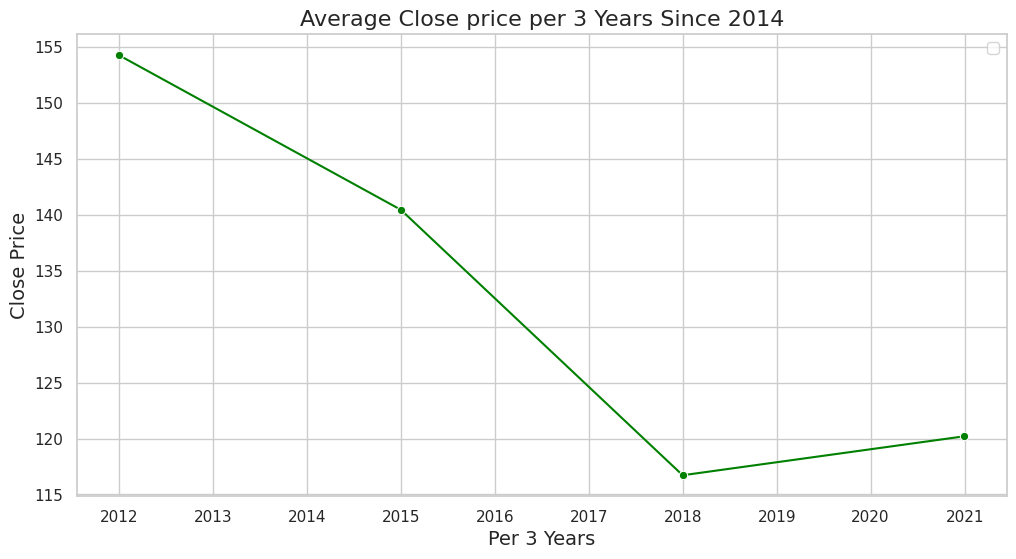

In [16]:
#Average Close price per 2 Years Since 1950
df_decade_sum=df.resample('3Y').mean()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_decade_sum.index, y='Close', data=df_decade_sum, marker='o', color='green')
plt.title('Average Close price per 3 Years Since 2014', fontsize=16)
plt.xlabel('Per 3 Years', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend()
plt.show()

28 Days Moving Average Line Plot

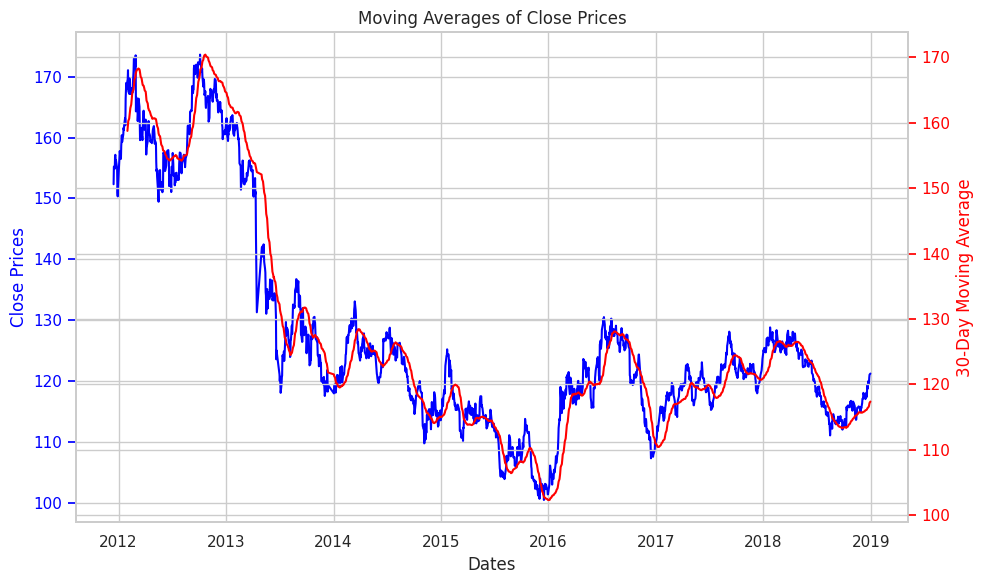

In [17]:
window_size = 30
df['MA'] = df['Close'].rolling(window=window_size).mean()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Close Prices on the left y-axis
ax1.plot(df.index, df['Close'], label='Close Prices', color='blue')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Close Prices', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for the Moving Average on the right
ax2 = ax1.twinx()
ax2.plot(df.index, df['MA'], label=f'{window_size}-Day Moving Average', color='red')
ax2.set_ylabel(f'{window_size}-Day Moving Average', color='red')
ax2.tick_params('y', colors='red')

# Title and legend
plt.title('Moving Averages of Close Prices')
fig.tight_layout()

# Show the plot
plt.show()

Checking For Data Stationarity

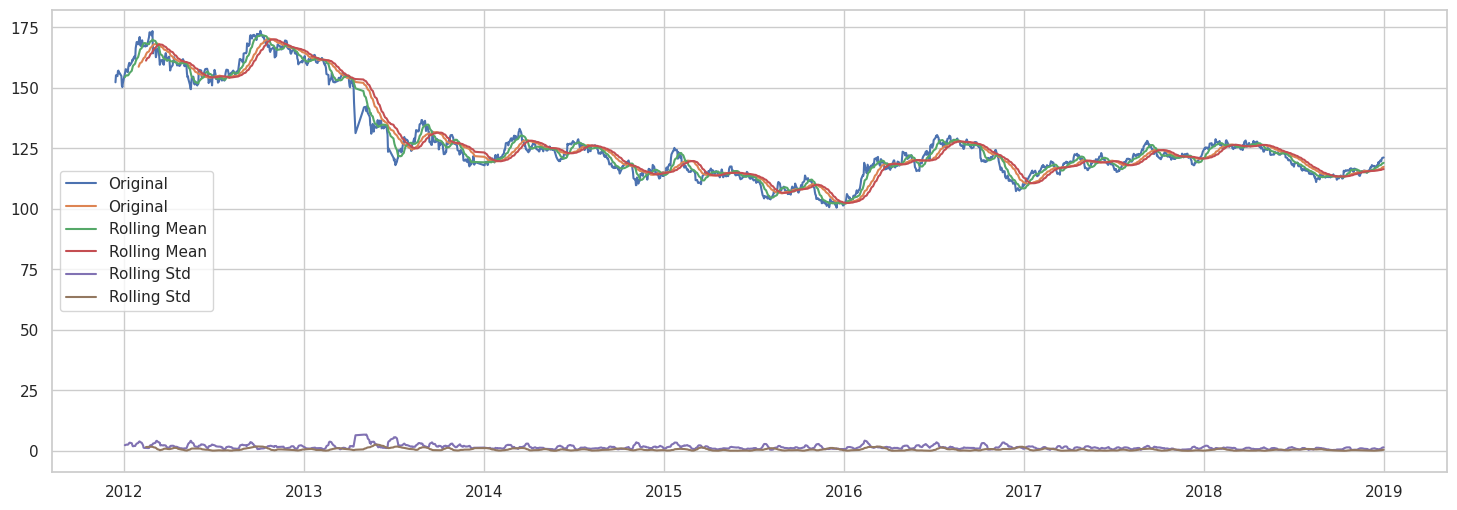

In [18]:
# Rolling Statistics and Standard Deviation Plot
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

# Plot the original time series along with rolling statistics
plt.figure(figsize=(18, 6))
plt.plot(df, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')

plt.legend()
plt.show()

ADF test to check data stationarity

At first passing the Close column to the adfuller function. adfuller function will gives us four different values:

ADF Test Statistic
p-value
#Lags Used
Number of Observaations Used In dicky-fuller test the null hypothesis indicates that the data is non stationary and alternate hypthesis says that the data is stationary. So if the p value is less than equal to 0.05 then the data is sationary else not stationary



In [19]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['Close'])

def adfuller_test(sales):
    result= adfuller(sales)
    labels=['ADF Test Statistic','p-value', '#Lags Used', 'Number of Observaations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1]<=0.05:
            print('Data is Stationary')
        else:
            print('Data is not stationary')
        
adfuller_test(df['Close'])

ADF Test Statistic : -1.8234601291067782
Data is not stationary
p-value : 0.3688781538232954
Data is not stationary
#Lags Used : 1
Data is not stationary
Number of Observaations Used : 1716
Data is not stationary


In [20]:
#To do this we will shift record down. The step depends on the data nature. Shifting means suppose have to two records and if we do 1 shift then first record will go to the second index and first index value will be none.
#So after shifting we will subtract the new value with the previous one and create a new column.
#Now in this dataset the data is seasonal and we have month wise data means 12 months in a year so we will shift 12. Then we will again pass the new column to the previously created dickey fuller function and do the test. Before passing we must need to drop the nan values. If the p value is less than equal to 0.05 then the data is stationary.

stationary_df= df['Close'] - df['Close'].shift()
adfuller_test(stationary_df.dropna())

ADF Test Statistic : -31.12395376252256
Data is Stationary
p-value : 0.0
Data is Stationary
#Lags Used : 1
Data is Stationary
Number of Observaations Used : 1715
Data is Stationary


<Axes: xlabel='Date'>

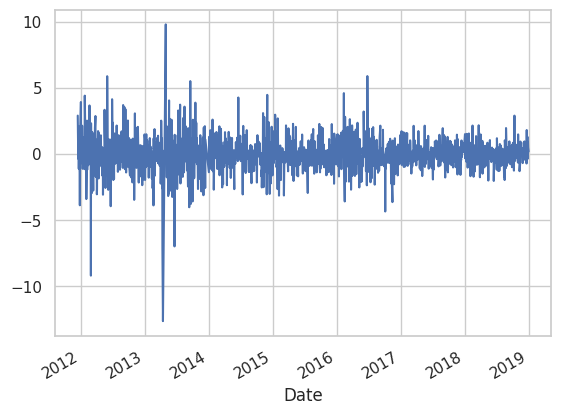

In [21]:
#To visualize ADF test
stationary_df.plot()

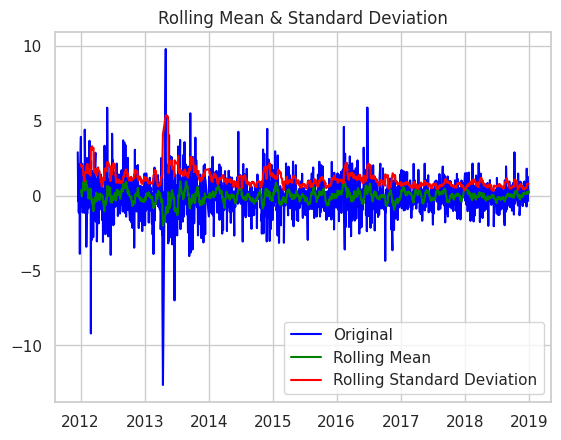

In [22]:
#Rolling Statistics and Standard Deviation Plot
rolling_mean = stationary_df.rolling(window=12).mean()
rolling_std = stationary_df.rolling(window=12).std()

orig=plt.plot(stationary_df,color='blue', label='Original')
orig=plt.plot(rolling_mean,color='green', label='Rolling Mean')
orig=plt.plot(rolling_std,color='red', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


Building ARIMA Model

Selecting p,i,q
Identification of an AR model is often best done with the PACF:
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

Identification of an MA model is often best done with the ACF rather than the PACF:
For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model. p,d,q p AR model lags d differencing q MA lags.

ARIMA model is a combinition of three different model so it takes three inputs p= Auto Regressive model lags. To find the p value pacf means partial autocorrelation graph is used. Here at first we will see some long lines. But suddenly the values and lines will decrease and comes near to zero. The x-axis value of first line which will lies inside the default blue mark area of the graph will be selected as p value.

i=differencing. To make the data stationary we shifted our value by 2 cells. We did this just one time. But after shifting 2 cells if the data doesn't become stationary then we need to again shift the value. So we have to do that again and again untill the data become satationary. So because we did shifting one time so d value will be 1. If we did three times then the d will be 3.

q=Moving Average lags. For q value we use autocorrelation graph. Here the values doesn't decrease suddenly. Here we will see exponential decrease. So the x-axis value of the first line comes inside the default blue area of the graph will be selected as q value.

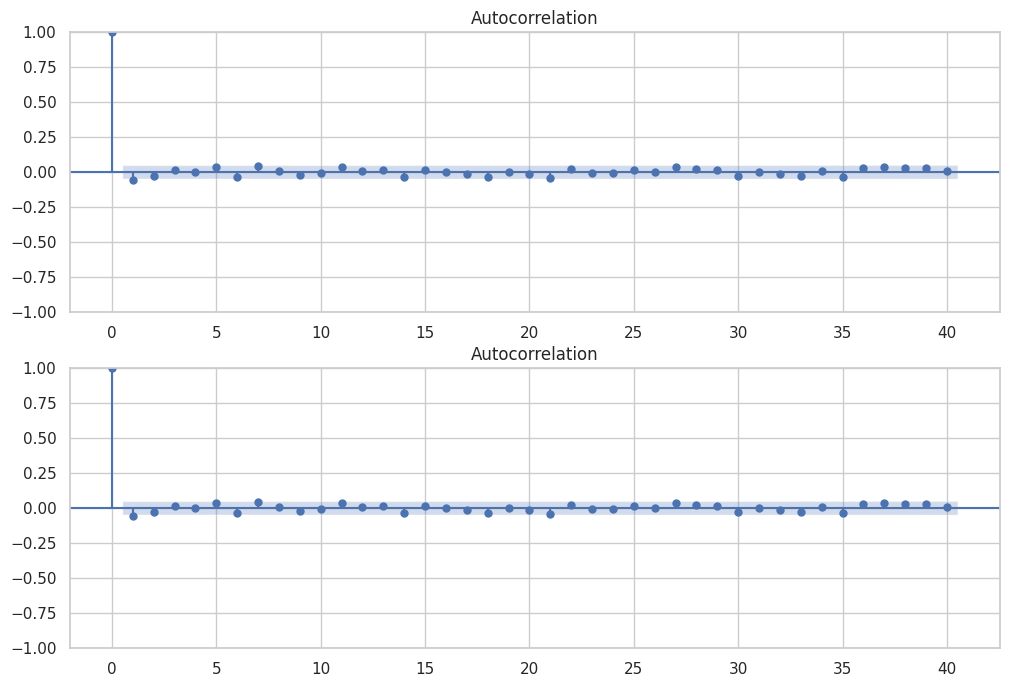

In [23]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(stationary_df,nlags=20)
lag_pacf=pacf(stationary_df,nlags=20)

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stationary_df.dropna(),lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(stationary_df.dropna(),lags=40,ax=ax2)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/o

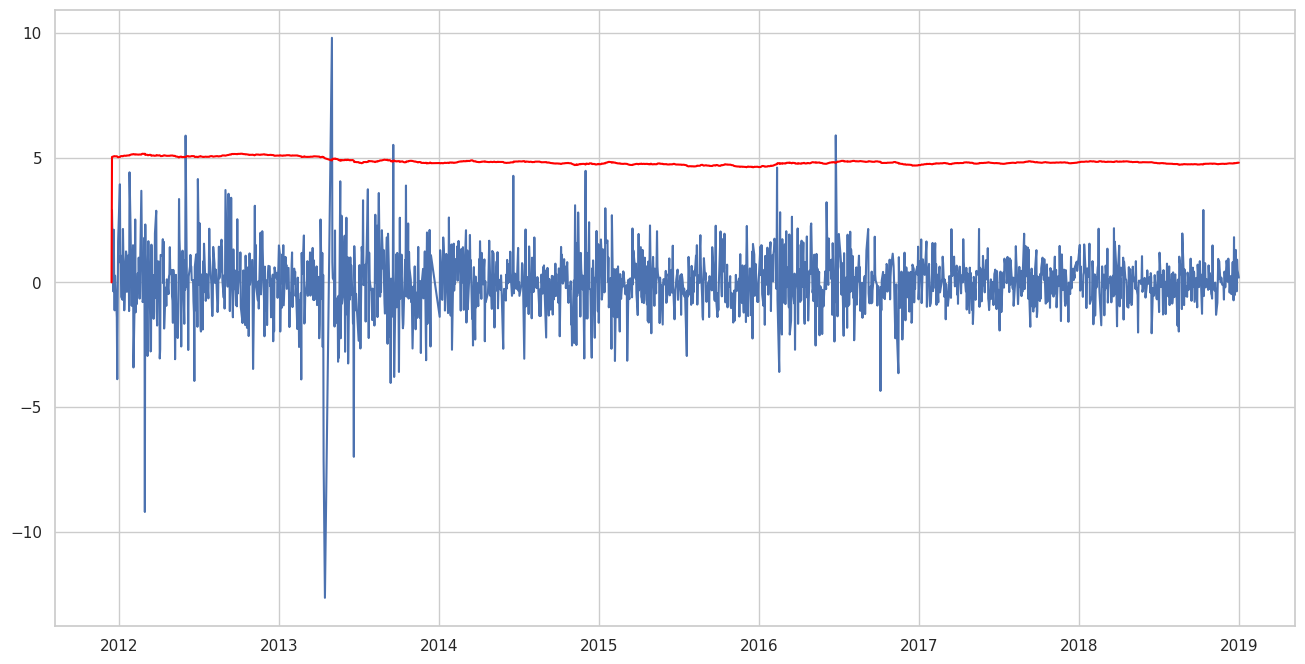

In [24]:
from statsmodels.tsa.arima.model import ARIMA
df_log=np.log(df['Close'])

plt.figure(figsize=(16, 8))
model = ARIMA(df_log, order=(3, 1, 3))
results_arima = model.fit()


plt.plot(stationary_df)
plt.plot(results_arima.fittedvalues, color='red')

In [25]:
# Here we are just creating a series of the predicted values
arima_prediction=pd.Series(results_arima.fittedvalues,copy=True)
print(arima_prediction.head())

Date
2011-12-15    0.000000
2011-12-16    5.026049
2011-12-19    5.043641
2011-12-20    5.042188
2011-12-21    5.055710
dtype: float64


In [26]:
# Beacuse we perform differencing so we have to do cumulative sum
arima_prediction_cumsum=arima_prediction.cumsum()
arima_log_prediction=pd.Series(df_log.iloc[0],index=df_log.index)
arima_log_prediction=arima_log_prediction.add(arima_prediction_cumsum,fill_value=0)
# We performed log transformation. To reverse it we have to perfomr expnential
final_prediction=np.exp(arima_log_prediction)

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Visualize the Prediction

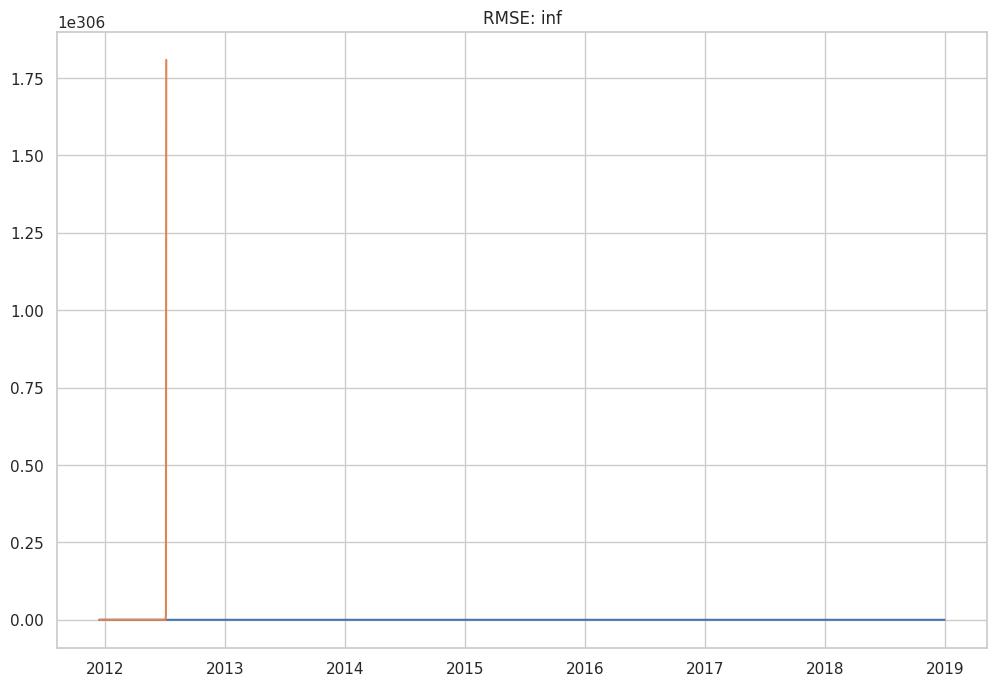

In [27]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.plot(final_prediction)
plt.title('RMSE: %.4f'% np.sqrt(sum((final_prediction-df['Close'])**2)/len(df['Close'])))
plt.show()

Predictions


In [28]:
results_arima.predict(1717,1800)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1717    4.795732
1718    4.797822
1719    4.797883
1720    4.797929
1721    4.797927
          ...   
1796    4.797927
1797    4.797927
1798    4.797927
1799    4.797927
1800    4.797927
Name: predicted_mean, Length: 84, dtype: float64